In [42]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [4]:
plt.rc('figure', figsize=(16, 9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=13)

np.random.seed(13)

## Simulation Based Approach
- Example: Codeup starts producing a scratch off lottery ticket called "Golden Codys". The odds of winning a prize must be advertised to the state, and since we are manufacturing the tickets, we know exactly how many winners and losers there are.
- Theory: Our population is the 1000 tickets we have manufactured
- Implementation: Create a boolean pandas Series
    - we model win with true and lose with false 
    - because of this, we can take the mean of a series to measure the likelihood of winning

The actual probability of winning is 0.25


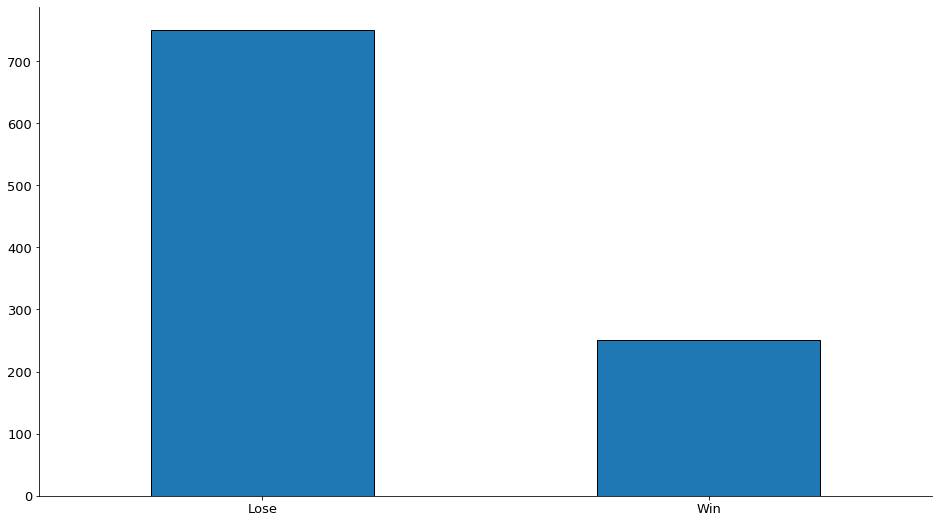

In [7]:
tickets = pd.Series([True] * 250 + [False] * 750)
tickets.value_counts().set_axis(['Lose', 'Win']).plot.bar()
plt.xticks(rotation=0)
print('The actual probability of winning is %.2f' % tickets.mean())

## Scenario: Each student in a classroom is given a Golden Cody scratch off at random
- Theory

- We we take a random sample and calculate the win rate, we won't expect to see exactly 25% even though we know that is what the overall rate is.

- Examples of biased samples:

- non-response: people that don't respond are a diff population
- undercoverage: some groups aren't well represented
- voluntary: people volunteer for surveys
- leading questions
- social desirability
- Implementation: Use the .sample method on our series to randomly choose 25 tickets, representing 25 students in a classroom. Use .mean to calculate what percentage of the values are True, or are winning tickets.

In [8]:
n = 25
tickets.sample(n).mean()

0.12

- Scenario: each student in 4 different cohorts is given a Golden Codys scratch off ticket, we want to calculate the win rate for each classroom.
- Theory: it is unlikely any classroom will have exactly a 25% winrate, instead we will see slightly different numbers for each classroom.
- Implementation: loop through a range of 5 to get a sample and calculate the winrate 5 times. Each of the 5 numbers produced represents the calculated winrate for one classroom of 25 students.

In [10]:
[tickets.sample(n).mean() for _ in range(5)]

[0.28, 0.28, 0.08, 0.24, 0.36]

## Theory

- The winrates we see aren't ever exactly 25%, but we would expect the rate to be closer to 25% than further away. That is, it is more likely that a classroom will come up with a win rate of 24% than a winrate of 10%.

- If we were to repeat this experiment a whole bunch of times, say 10,000, we would find that the calculated winrates are, in fact, normally distributed.

- That is, we would expect the calculated average winrate for a classroom to follow a normal distribution, even though the underlying random process is not based on a normal distribution

- Implementation: To visualize this, we'll create a series full of calculated winrates for 10,000 classrooms, each classroom made up of 25 students. That is, we will simulate 10,000 classrooms of 25 students getting Golden Codys and calculate the average winrate for each of the 10,000 classrooms.

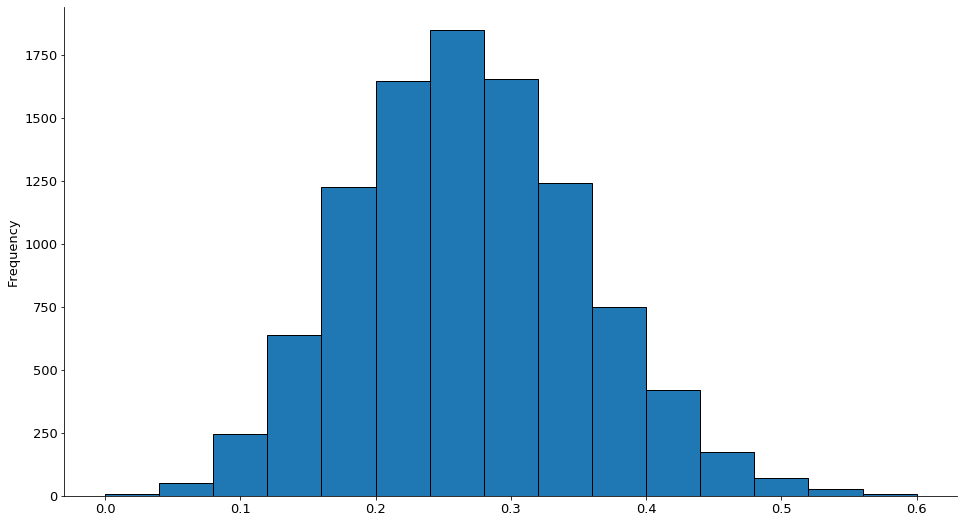

In [11]:
calculated_winrates = pd.Series([tickets.sample(n).mean() for _ in range(10_000)])
calculated_winrates.plot.hist(bins=15)

## Theory

- The above visual represents the sampling distribution for the winrate of Golden Codys, based on a class of 25.

- The Central Limit Theorm says that sampling distribution will be normally distributed even if the underlying random variable isn't.

## Mini Exercise -- CLT
1. Calculate, theoretically (in your head is fine), the expected value for the average of 6 dice rolls. 
   - I would say the average would be around 3. All the numbers have a even chance of coming out 
2. Write the code necessary to simulate taking the average of 6 dice rolls 10,000 times. Store each of the 10,000 averages in a list.
3. Plot the distribution of the calculated averages. What do you notice about the shape of the distribution of calculated averages? What kind of distribution is the underlying random variable (i.e. one dice roll?)

In [22]:
n_trials = n_rows = 10_000
n_dice = n_cols = 6
rolls = np.random.choice([1,2,3,4,5,6], n_rows * n_cols).reshape(n_rows,n_cols)
df = pd.DataFrame(rolls)
df["AVG"] = rolls.mean(axis = 1)
df

,0,1,2,3,4,5,AVG
0,5,1,2,2,4,5,3.166667
1,5,3,2,2,5,5,3.666667
2,3,5,3,3,6,3,3.833333
3,5,2,2,1,3,5,3.000000
4,1,5,5,3,3,3,3.333333
...,...,...,...,...,...,...,...
9995,6,1,3,3,3,4,3.333333
9996,2,3,2,2,6,1,2.666667
9997,5,5,2,5,2,3,3.666667
9998,6,3,5,1,3,1,3.166667


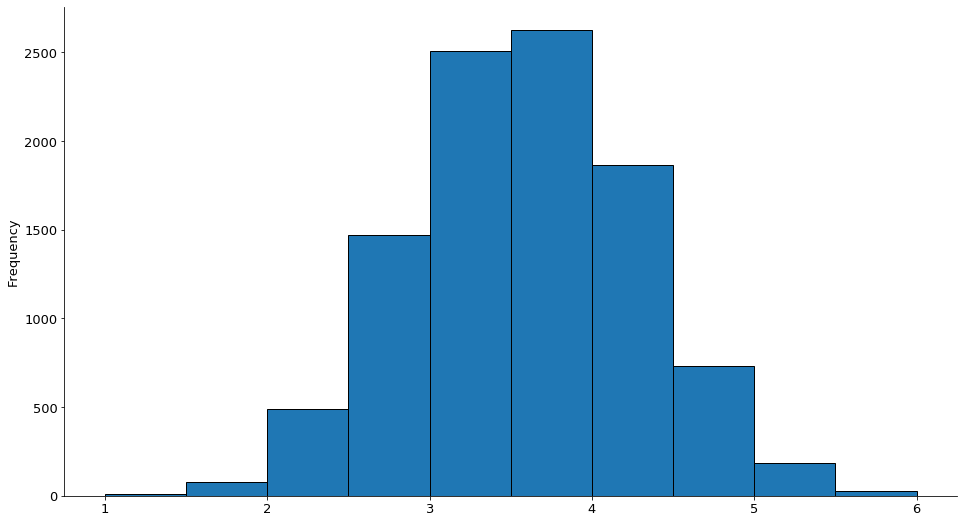

In [26]:
df.AVG.plot.hist(bins = 10)

What do you notice about the shape of the distribution of calculated averages? The shape is a normal distribution.  What kind of distribution is the underlying random variable (i.e. one dice roll?). I would say a uniform distribution as there is a 1 in 6 chance for all the numbers to come out. 

- Theory: in practice, we won't have 10,000 samples to work with, but rather just 1. We can stil rely on the sampling distribution being normally distributed, and this has some intersting properties.
- the mean of the sampling distribution of the sample means will be the "true" mean
- the variance of the sampling distribution is the population variable divided by the sample size
- the standard deviation of the sampling distribution is (pq/n)^.5 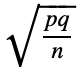
 (for our example), aka the standard error

In [12]:
se = math.sqrt((.25 * .75) / n)

Let's compare our calculated standard error (i.e. the standard deviation of the sample means) to the experimental value:

In [13]:
print('SE:                 %.4f' % se)
print('sample_means.std(): %.4f' % calculated_winrates.std())

SE:                 0.0866
sample_means.std(): 0.0857


### That the sampling distribution being normally distributed is very powerful and has important implications:

- confidence intervals for population parameter estimates (e.g. estimating the population mean)
- as n goes up, interval becomes smaller
- as certainty goes up, interval becomes larger
- 99% of calculated CIs will contain the true mean (e.g. if we ran simulations and re-sampled, 99% of the simulations' calculated CIs would contain the true mean)
- hypothesis testing
- One classroom calculates their winrate at 20% and claims the tickets were distributed unfairly. What is the likelihood we observe a 20% (or smaller) winrate just due to chance?

In [14]:
mean = calculated_winrates.mean()
sd = calculated_winrates.std()

stats.norm(mean, sd).cdf(.2)

0.28283511827393837

The probability we've calculated is a p-value. The likelihood that we observe the data that we have if the null hypothesis is true.



### Null and Alternative Hypothesis
- Ho
: status quo: no difference or no effect
- Ha
: alternative: there is a difference or effect
- whether Ha
 is ≠
, <, >, determines one-tailed vs two-tailed test
< or > == one-tailed
≠
 == two-tailed
### Hypothesis Testing Results
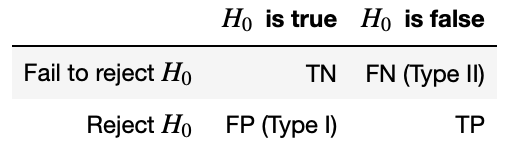

### Mini Exercise -- Null + Alternate Hypothesis and Errors NEED TO EDIT
For each of the following scenarios: refine the question, generate a null and alternative hypothesis, and give examples of true positives, true negatives, type I and type II errors.

- Are the average grades in web development vs data science classes different? 
    - Ho: The average grades are not significantly different.
    - Ha: The average grades are different
    - True Pos - Grades are different, reject Ho
    - True Neg - Grades are similar, accept Ho
    - Type 1 error - Grades are similar but Ho was rejected
    - Type 2 error - Grades are not and the Ho was accepted
    
- Is there a relationship between how early a student shows up to class and their grade?
    - Ho: Student who shows up early gets a better grade
    - Ha: Student that shows up late gets a better grade
    - True Pos - Not showing up early and rejecting the Ho or getting bad grade
    - True Neg - Showing up early and accepting Ho or getting a good grade
    - Type 1 error - Shows up early but Ho was rejected or has a bad grade
    - Type 2 error - Not showing up early and the Ho was accepted or grades are good
- Are web dev or data science students more likely to be coffee drinkers?
    - Ho: DS are coffee drinkers
    - Ha: WD are coffee drinkers
    - True Pos - WD don't drink coffee and rejecting the Ho
    - True Neg - DS drink coffee and accepting Ho 
    - Type 1 error - DS drink coffee but Ho was rejected or does not drink coffee
    - Type 2 error - WD drink coffee and the Ho was accepted or drinks coffee

### 1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [17]:
sample_1 = n1 = 40     
mean_1 = 90     
std_1 = s1 = 15
sample_2 = n2 = 50     
mean_2 = 100     
std_2 = s2 = 20
alpha = .05

### B. Set Hypothesis
$H_{0}$: Mean of home sales for office 1 = Mean of home sales for office 2

$H_{a}$: Mean of home sales for office 1 > Mean of home sales for office 2
### C. alpha = .05
### D. Sample of 40 & 50
### E. Compute test statistic and probability (t-statistic & p-value)

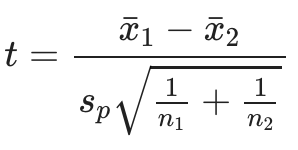

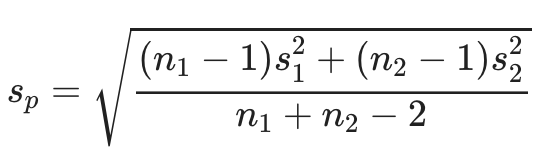

In [13]:
Sp = (((sample_1 - 1) * (std_1 ** 2) + (sample_2 - 1) * (std_2 ** 2))/(sample_1 + sample_2 - 2)) ** .5
print(Sp)

17.956702977389302


In [15]:
t = (mean_1 - mean_2) / (Sp * ((1/sample_1) + (1/sample_2)) ** .5)
print(t)

-2.6252287036468456


In [26]:
standard_error = se = (s1**2 / n1 + s2**2 / n2) ** .5
se

3.69120576505835

In [28]:
degf = n1 + n2 - 2
degf

88

In [33]:
#p = stats.t(degf).sf(t) * 2
#p

In [35]:
p = stats.t(degf).cdf(t) * 2
print(t,p)

-2.6252287036468456 0.01020985244923939


In [36]:
# Reject the null hyp Ho due to p being less than alpha. There is a significant difference between sells from
# office 1 and office 2
p < alpha

True

### 2. Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

In [43]:
sns.get_dataset_names()

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:384: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file /usr/local/anaconda3/lib/python3.7/site-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [58]:
# Wrong data set
df = sns.load_dataset('mpg')
df.mpg.value_counts()
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [65]:
from pydataset import data
mpg = data("mpg")
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
$H_{0}$: Mean fuel efficiency of 2008 cars = Mean of fuel efficency of 1999 cars

$H_{a}$: Mean fuel efficiency of 2008 cars > Mean of fuel efficency of 1999 cars

In [69]:
# Making a avg mpg variable
mpg["average_mpg"] = (mpg["cty"] + mpg["hwy"])/2
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [75]:
# Making 2 variables for average mpg for cars in 1999 and 2008
cars_99 = mpg[mpg.year == 1999].average_mpg
cars_08 = mpg[mpg.year == 2008].average_mpg


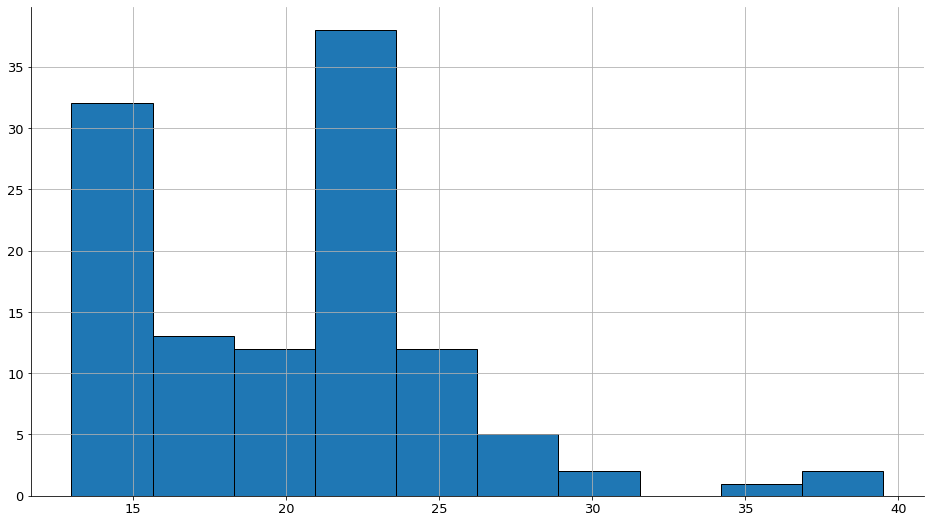

In [73]:
# Creating histograms of the mpg for each year
cars_99.hist()

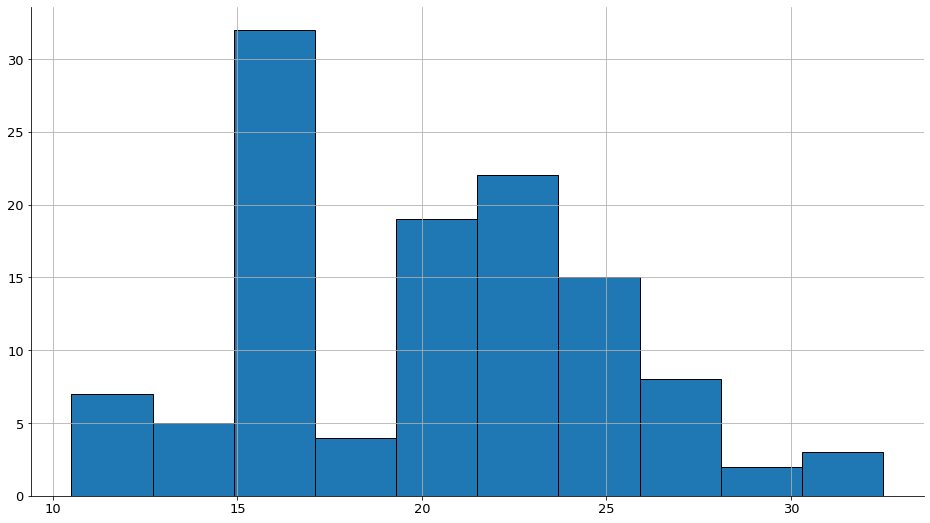

In [74]:
cars_08.hist()

In [76]:
# Checking variances. They are close enought. Histograms showed enough samples for test
print(cars_99.var())
print(cars_08.var())

27.122605363984682
24.097480106100797


In [77]:
t, p = stats.ttest_ind(cars_99, cars_08)
print(t, p)

0.21960177245940962 0.8263744040323578


In [78]:
# p = .8263 which is > than alpha .05. We fail to reject the Ho (null hypothesis). There is no significant
# differences in mpg for 1999 and 2008 cars

### Are compact cars more fuel-efficient than the average car?
$H_{0}$: Mean fuel efficiency of compact cars = Mean of fuel efficency the average car

$H_{a}$: Mean fuel efficiency of compact cars > Mean of fuel efficency the average car

(array([ 9., 12., 14.,  7.,  1.,  2.,  1.,  0.,  0.,  1.]),
 array([19.5, 21.4, 23.3, 25.2, 27.1, 29. , 30.9, 32.8, 34.7, 36.6, 38.5]),
 <a list of 10 Patch objects>)

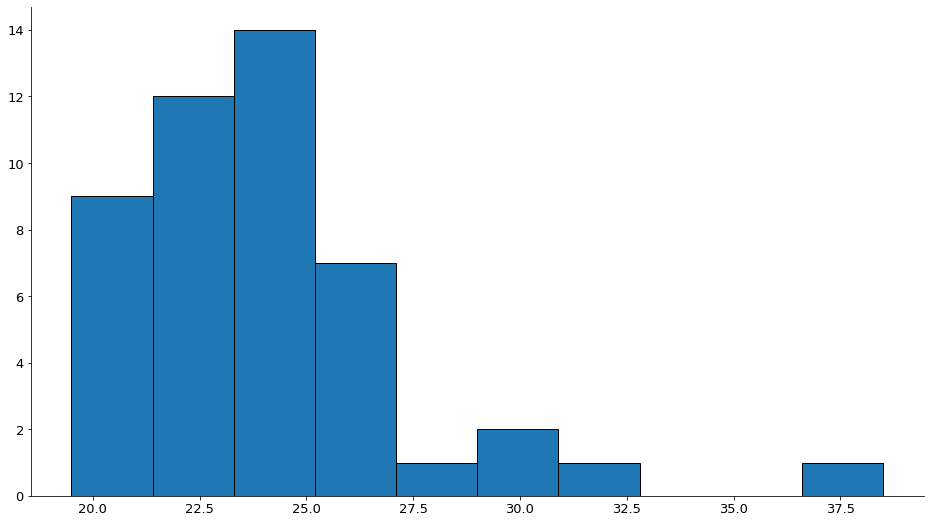

In [89]:
# First creating a column of compact cars avg mpg and all cars mpg
compact = mpg[mpg["class"] == "compact"].average_mpg
avg_mpg = mpg.average_mpg
plt.hist(compact)

(array([17., 51., 30., 57., 36., 29., 10.,  1.,  1.,  2.]),
 array([10.5, 13.4, 16.3, 19.2, 22.1, 25. , 27.9, 30.8, 33.7, 36.6, 39.5]),
 <a list of 10 Patch objects>)

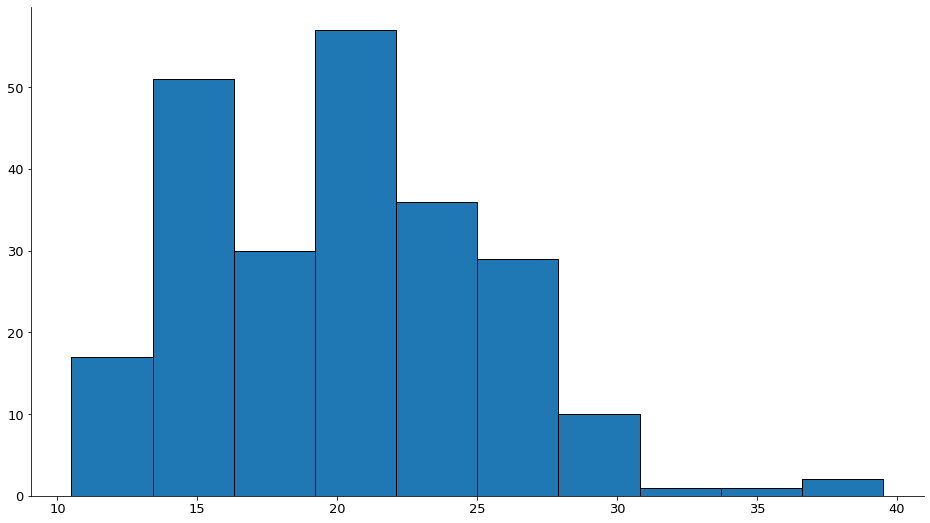

In [90]:
plt.hist(avg_mpg)

In [92]:
# P/2 due to question asking if compact cars get better mpg than the average car
t, p = stats.ttest_ind(compact, avg_mpg)
print(t, p/2)

5.260311926248542 1.4342273079064686e-07


In [94]:
# Reject the null hyp Ho due to p being less than alpha. There is a significant difference between mpg of 
# of compact cars and all 
p < alpha

True

### Do manual cars get better gas mileage than automatic cars?
$H_{0}$: Mean fuel efficiency of manual cars = Mean of fuel efficency of automatic cars

$H_{a}$: Mean fuel efficiency of manual cars > Mean of fuel efficency of automatic cars

In [97]:
# creating columns of automatic and manual cars. using np.where to search for "a" in category to label trans
mpg['trans_type'] = np.where(mpg.trans.str.startswith('a'), 'auto', 'manual')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg,trans_type
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,auto
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,manual
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,auto
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0,manual


In [99]:
# Creating variables to get the averages of automatic and manual trans
auto = mpg[mpg["trans_type"] == "auto"].average_mpg
manual = mpg[mpg["trans_type"] == "manual"].average_mpg

(array([ 6., 35., 27., 20., 35., 18.,  9.,  4.,  2.,  1.]),
 array([10.5 , 12.95, 15.4 , 17.85, 20.3 , 22.75, 25.2 , 27.65, 30.1 ,
        32.55, 35.  ]),
 <a list of 10 Patch objects>)

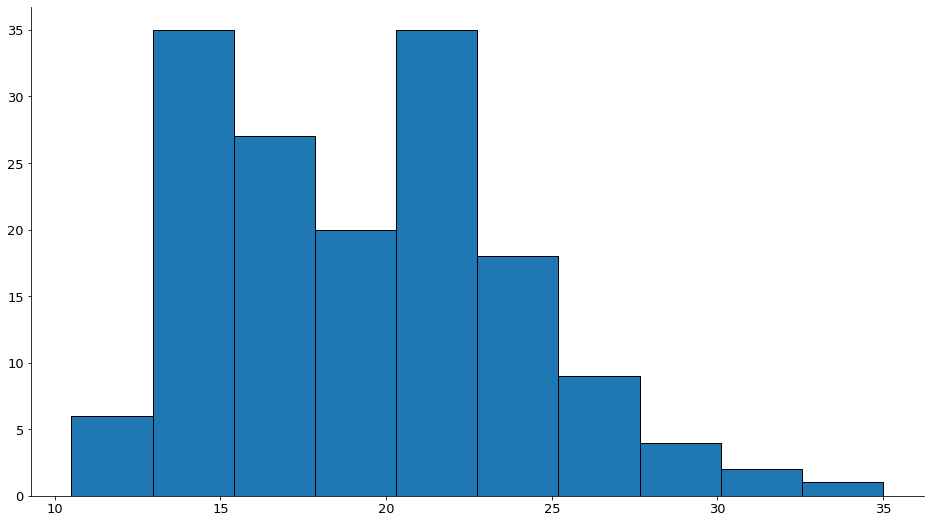

In [100]:
plt.hist(auto)

(array([ 1., 10.,  8., 22., 10., 19.,  4.,  1.,  0.,  2.]),
 array([10.5, 13.4, 16.3, 19.2, 22.1, 25. , 27.9, 30.8, 33.7, 36.6, 39.5]),
 <a list of 10 Patch objects>)

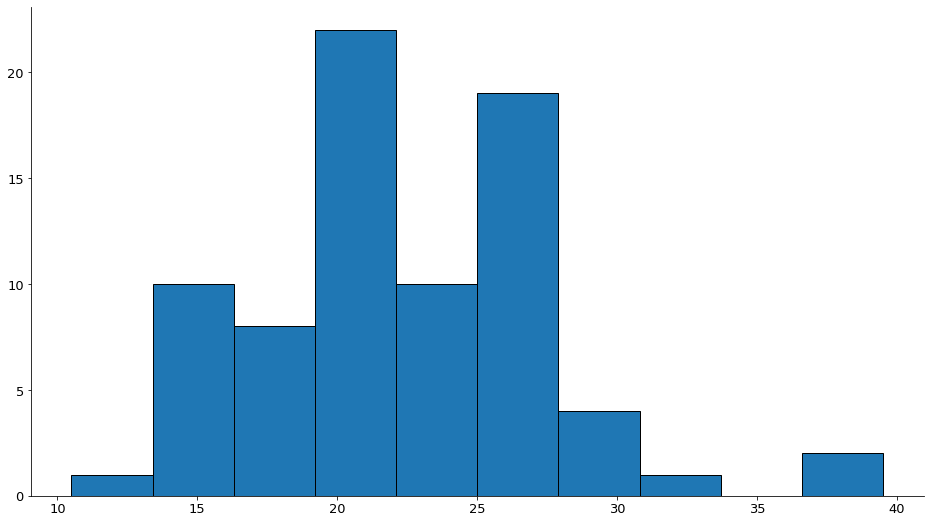

In [101]:
plt.hist(manual)

In [102]:
# P/2 due to the question asking if auto trans has a better mpg than manual
t, p = stats.ttest_ind(auto, manual)
print(t, p/2)

-4.593437735750014 3.5771872005728416e-06


In [103]:
# Reject the null hyp Ho due to p being less than alpha. There is a significant difference between mpg of 
# automatic and manual transmission 
p < alpha

True

## Correlations Exercises

### 1. Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?